In [25]:
from distribution import Distribution
from solvers import BetaPolicyBanditSolver, MDPsolver
from beta_env import TerminalCliff, pair_sum 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import matplotlib.cm as cm
import matplotlib.colorbar as colorbar
from matplotlib.colors import Normalize
from time import sleep
from IPython.display import clear_output
from tueplots import bundles, figsizes

# First XP

In [26]:
env = TerminalCliff()
print(f"Nombre de colonnes : {env.nb_col}")
print(f"Nombre de lignes : {env.nb_line}")
print(f"Nombre d'états : {env.state_space}")

Nombre de colonnes : 5
Nombre de lignes : 4
Nombre d'états : 21


In [27]:
print(env.transition(5,3,0))
print(env.transition(6,3,1))
print(env.transition(7,3,2))
print(env.transition(8,3,3))
print(env.transition(9,0,3))
print(env.transition(4,2,4))
print(env.transition(2,3,2))
print(env.transition(16,2,4))
print(env.transition(19,1,4))

[[0.10000000000000002, 0, 0], [0.10000000000000002, 10, 0], [0.10000000000000002, 5, 0], [0.7, 6, 0]]
[[0.10000000000000002, 1, 0], [0.10000000000000002, 11, 0], [0.10000000000000002, 5, 0], [0.7, 7, 0]]
[[0.10000000000000002, 2, 0], [0.10000000000000002, 12, 0], [0.10000000000000002, 6, 0], [0.7, 8, 0]]
[[0.10000000000000002, 3, 0], [0.10000000000000002, 13, 0], [0.10000000000000002, 7, 0], [0.7, 9, 0]]
[[0.7, 4, 0], [0.10000000000000002, 14, 0], [0.10000000000000002, 8, 0], [0.10000000000000002, 9, 0]]
[[1, 20, 0.8666666666666667]]
[[1, 20, -0.5]]
[[0.10000000000000002, 11, 0], [0.10000000000000002, 16, 0], [0.7, 15, 0], [0.10000000000000002, 17, 0]]
[[0.10000000000000002, 14, 0], [0.7, 19, 0], [0.10000000000000002, 18, 0], [0.10000000000000002, 19, 0]]


In [28]:
# parameters
horizon = 15


In [29]:
env = TerminalCliff(horizon=horizon)
solver = MDPsolver(env, horizon=horizon)

In [30]:
solver.solve()

Step 14, computed : [(-10, 10)]
Total intervals computed : 47
Step 13, computed : [(-10, 10)]
Total intervals computed : 262
Step 12, computed : [(-10, 10)]
Total intervals computed : 1367
Step 11, computed : [(-10, 10)]
Total intervals computed : 6969
Step 10, computed : [(-10, -6.707932066980033), (-6.707932066980033, -3.2290655941018938), (-3.2290655941018938, 10)]
Total intervals computed : 11957
Step 9, computed : [(-10, -7.61374923229929), (-7.61374923229929, -7.321615787426763), (-7.321615787426763, -7.159703787136148), (-7.159703787136148, -6.707932066980033), (-6.707932066980033, -3.339507403195542), (-3.339507403195542, -3.2290655941018938), (-3.2290655941018938, -2.8705408521710303), (-2.8705408521710303, -1.4223002946848609), (-1.4223002946848609, 10)]
Total intervals computed : 19199
Step 8, computed : [(-10, -9.372264554381013), (-9.372264554381013, -7.61374923229929), (-7.61374923229929, -7.572414723363217), (-7.572414723363217, -7.566159365130964), (-7.566159365130964, 

In [31]:
intervals = solver.process_intervals(solver.intervals[0], 1e-3)
n_policy = len(intervals)

In [32]:
def get_policy(solver, step, interval):
    policy = np.zeros(solver.env.state_space)
    for s in range(solver.env.state_space):
        interval_found = False
        assert len(solver.intervals[step][s]) == len(solver.optimal_actions[step][s])
        for k in range(len(solver.intervals[step][s])):
            i = solver.intervals[step][s][k]
            if solver._is_in_interval(interval,i):
                policy[s] = solver.optimal_actions[step][s][k]
                interval_found = True
                break

        if not interval_found:
            print(f"Interval not found for state {s}")
            print(f"Interval : {interval}")
            print(f"Intervals for that state : {solver.intervals[step][s]}")
            raise ValueError
    return policy
        

In [33]:
policy = np.array(get_policy(solver, 0, intervals[0]), dtype=int)
print(policy)

[0 0 0 0 0 1 1 1 3 0 1 1 1 1 1 3 3 3 3 1 0]


In [34]:
env.display_actions(policy)

→ → → → ↑ 
↑ ↑ ↑ ↑ ↑ 
↑ ↑ ↑ → ↓ 
X X X X E


In [35]:
def get_policy(solver, step, interval):
    policy = np.zeros(solver.env.state_space)
    for s in range(solver.env.state_space):
        interval_found = False
        assert len(solver.intervals[step][s]) == len(solver.optimal_actions[step][s])
        for k in range(len(solver.intervals[step][s])):
            i = solver.intervals[step][s][k]
            if solver._is_in_interval(interval,i):
                policy[s] = solver.optimal_actions[step][s][k]
                interval_found = True
                break

        if not interval_found:
            print(f"Interval not found for state {s}")
            print(f"Interval : {interval}")
            print(f"Intervals for that state : {solver.intervals[step][s]}")
            raise ValueError
    return policy

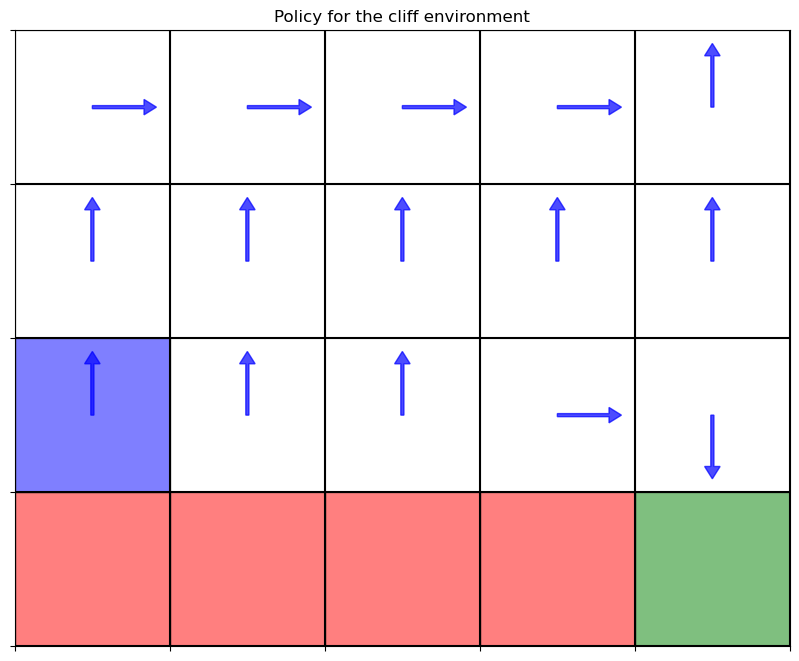

In [36]:

fig, ax = plt.subplots(figsize=(10, 8))

def print_actions(policy, title=None):
    x_size, y_size = (env.nb_col, env.nb_line)

    # Mapping actions to directions
    action_dict = [(0, -1), (0, 1), (-1, 0),  (1, 0)]

    # Create the grid
    for x in range(x_size + 1):
        ax.plot([x, x], [0, y_size], color='black')
    for y in range(y_size + 1):
        ax.plot([0, x_size], [y, y], color='black')

    # Color the cliff
    for x in range(x_size-1):
        rect = patches.Rectangle(
            (x, y_size-1), 1, 1, linewidth=1, edgecolor='black', facecolor='red', alpha=0.5)
        ax.add_patch(rect)

    # Color the goal and the beginning
    rect = patches.Rectangle(
        (x_size-1, y_size-1), 1, 1, linewidth=1, edgecolor='black', facecolor='green', alpha=0.5)
    ax.add_patch(rect)
    rect = patches.Rectangle(
        (0, 2), 1, 1, linewidth=1, edgecolor='black', facecolor='blue', alpha=0.5)
    ax.add_patch(rect)

    # Add the policy arrows
    for y in range(1,y_size):
        for x in range(x_size):
            action_probs = [0] * 4
            action_probs[policy[env.pos_to_state((x, y))]] = 1
            for action, prob in enumerate(action_probs):
                dx, dy = action_dict[action]
                if prob > 0:
                    ax.arrow(x + 0.5, y_size - y - 0.5, dx * prob/3, -dy * prob/3,
                                head_width=0.1, head_length=0.08, width=0.02, fc='blue', ec='blue', alpha=0.7)

    # Set limits and labels
    ax.set_xlim(0, x_size)
    ax.set_ylim(0, y_size)
    ax.set_xticks(np.arange(x_size + 1))
    ax.set_yticks(np.arange(y_size + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Show the plot
    plt.gca().invert_yaxis()
    plt.grid(True)
    if title == None:
        plt.title(f"Policy for the cliff environment")
    else:
        plt.title(title)

print_actions(policy)

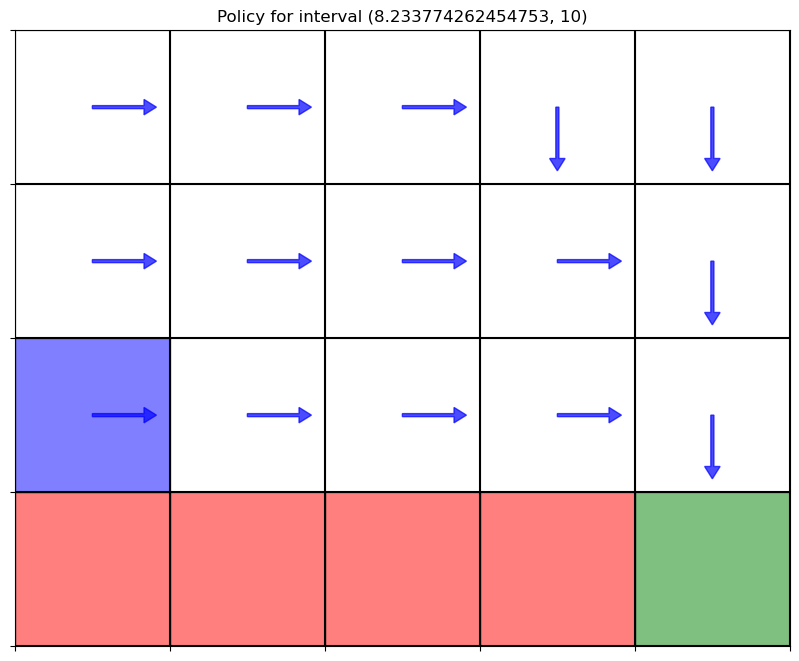

In [37]:
fig, ax = plt.subplots(figsize=(10, 8))

for interval in intervals:
    policy = np.array(get_policy(solver, 0, interval), dtype=int)
    ax.cla()
    print_actions(policy, f"Policy for interval {interval}")
    sleep(1)

In [38]:

# Colormap for the gradient from blue to red
cmap = cm.get_cmap('rainbow')
#cmap = cm.get_cmap('coolwarm')

# Function to get a color based on the beta value
def get_color_for_beta(beta):
    norm_beta = (beta + 10) / 20  # Normalize beta to [0, 1] for colormap
    return cmap(norm_beta)

color_init = get_color_for_beta(-10)

In [39]:
initial_actions = np.array(get_policy(solver, 0, intervals[0]), dtype=int)
arrow_changes = np.full(env.state_space, None)  # Store the beta at which the change occurs
has_changed = np.full(env.state_space, False)  # Store if the beta has changed

for interval in intervals:
    policy = np.array(get_policy(solver, 0, interval), dtype=int)
    for s in range(env.state_space):
        if policy[s] != initial_actions[s]:
            if not has_changed[s]:
                has_changed[s] = True
                arrow_changes[s] = (interval[0], policy[s])
            elif policy[s] != arrow_changes[s][1]:
                arrow_changes[s] = (interval[0], policy[s])

print (arrow_changes)

[None None None None None (1.944501834256795, 3) (0.9842950009809364, 3)
 (-0.2590000000000002, 3) None None (-2.3745594106832675, 3)
 (-2.9654862226713363, 3) (-3.9191360368306793, 3) (-8.673166483763913, 3)
 (-7.891381659439209, 0) None None None (7.428212713341748, 0)
 (-7.522561584155461, 0) None]


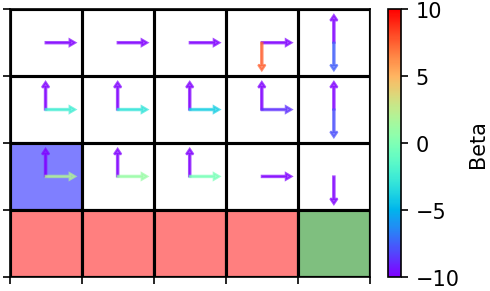

In [52]:
from tueplots import bundles, figsizes
plt.rcParams.update(figsizes.icml2022_half())
plt.rcParams.update({"figure.dpi": 150})

fig, ax = plt.subplots(figsize=(3.33, 2))

x_size, y_size = (env.nb_col, env.nb_line)

# Mapping actions to directions
action_dict = [(0, -1), (0, 1), (-1, 0),  (1, 0)]

# Create the grid
for x in range(x_size + 1):
    ax.plot([x, x], [0, y_size], color='black')
for y in range(y_size + 1):
    ax.plot([0, x_size], [y, y], color='black')

# Color the cliff
for x in range(x_size-1):
    rect = patches.Rectangle(
        (x, y_size-1), 1, 1, linewidth=1, edgecolor='black', facecolor='red', alpha=0.5)
    ax.add_patch(rect)

# Color the goal and the beginning
rect = patches.Rectangle(
    (x_size-1, y_size-1), 1, 1, linewidth=1, edgecolor='black', facecolor='green', alpha=0.5)
ax.add_patch(rect)
rect = patches.Rectangle(
    (0, 2), 1, 1, linewidth=1, edgecolor='black', facecolor='blue', alpha=0.5)
ax.add_patch(rect)

# Add the policy arrows
for y in range(1,y_size):
    for x in range(x_size):
        action = initial_actions[env.pos_to_state((x, y))]
        prob = 1
        dx, dy = action_dict[action]
        ax.arrow(x + 0.5, y_size - y - 0.5, dx * prob/3, -dy * prob/3,
                    head_width=0.1, head_length=0.08, width=0.02, fc=color_init, ec=color_init, alpha=0.7)

        if arrow_changes[env.pos_to_state((x, y))] is not None:
            beta, new_action = arrow_changes[env.pos_to_state((x, y))]
            color = get_color_for_beta(beta)
            dx, dy = action_dict[new_action]
            ax.arrow(x + 0.5, y_size - y - 0.5, dx * prob/3, -dy * prob/3,
                        head_width=0.1, head_length=0.08, width=0.02, fc=color, ec=color, alpha=0.7)

# Set limits and labels
ax.set_xlim(0, x_size)
ax.set_ylim(0, y_size)
ax.set_xticks(np.arange(x_size + 1))
ax.set_yticks(np.arange(y_size + 1))
ax.set_xticklabels([])
ax.set_yticklabels([])

# Create a color bar
norm = Normalize(vmin=-10, vmax=10)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # We don't need the data array, just the color scale
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Beta')


# Show the plot
plt.gca().invert_yaxis()
plt.grid(True)


In [53]:
fig.savefig("cliff_policies.pdf")

# Second XP

In [42]:
#parameters

#np random seed
seed = None
#TODO : add the np seed method to control the experiments

###grid search
accuracy_max = 1e-3
accuracy_min = 1e-1
nb_points = 10

###env paramters
horizon = 15
env = TerminalCliff(horizon=horizon)

In [43]:
grid_search_accuracies = np.exp(np.linspace(np.log(accuracy_max),np.log(accuracy_min), nb_points))[::-1]
values = np.zeros(nb_points)

for accuracy_idx in range(len(grid_search_accuracies)):
    accuracy = grid_search_accuracies[accuracy_idx]
    print(f"Accuracy: {accuracy}, loop {accuracy_idx+1}/{len(grid_search_accuracies)}")

    solver = MDPsolver(env, horizon=horizon, accuracy=accuracy)
    solver.solve()
    values[accuracy_idx] = solver.intervals_computed
    clear_output(wait=True)

Accuracy: 0.0010000000000000002, loop 10/10
Step 14, computed : [(-10, 10)]
Total intervals computed : 46
Step 13, computed : [(-10, 10)]
Total intervals computed : 257
Step 12, computed : [(-10, 10)]
Total intervals computed : 1358
Step 11, computed : [(-10, 10)]
Total intervals computed : 6956
Step 10, computed : [(-10, -6.707932066980033), (-6.707932066980033, -3.2290655941018938), (-3.2290655941018938, 10)]
Total intervals computed : 11940
Step 9, computed : [(-10, -7.61374923229929), (-7.61374923229929, -7.321615787426763), (-7.321615787426763, -7.159703787136148), (-7.159703787136148, -6.707932066980033), (-6.707932066980033, -3.339507403195542), (-3.339507403195542, -3.2290655941018938), (-3.2290655941018938, -2.8705408521710303), (-2.8705408521710303, -1.4223002946848609), (-1.4223002946848609, 10)]
Total intervals computed : 19179
Step 8, computed : [(-10, -9.372264554381013), (-9.372264554381013, -7.61374923229929), (-7.61374923229929, -7.572414723363217), (-7.572414723363217

In [44]:
print(values)

[16981. 21280. 26276. 31929. 37905. 44178. 50618. 57586. 64395. 71515.]


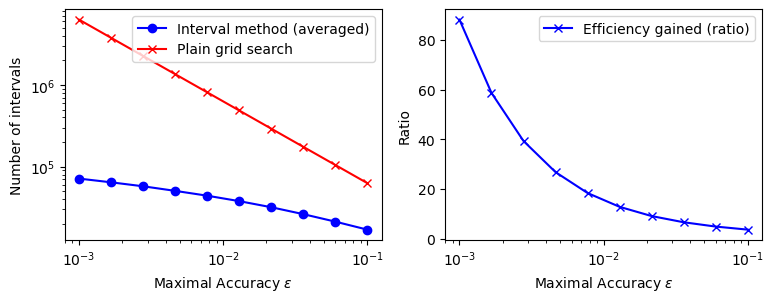

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3))
interval = (-10, 10)
interval_span = interval[1] - interval[0]
naive_grid_search_intervals = [(interval_span/accuracy)*env.state_space*horizon for accuracy in grid_search_accuracies]

ax[0].plot(grid_search_accuracies, values, label='Interval method (averaged)', color='blue', marker='o')
ax[0].plot(grid_search_accuracies, naive_grid_search_intervals, label='Plain grid search', color='red', marker='x')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].legend(prop={'size': 10})

ax[0].set_xlabel(r'Maximal Accuracy $\varepsilon$')
ax[0].set_ylabel('Number of intervals')

ax[1].plot(grid_search_accuracies, naive_grid_search_intervals/values, label='Efficiency gained (ratio)', color='blue', marker='x')
ax[1].set_xscale('log')
ax[1].legend(prop={'size': 10})

ax[1].set_xlabel(r'Maximal Accuracy $\varepsilon$')
ax[1].set_ylabel('Ratio')

fig.savefig('cliff_intervals_vs_naive.pdf')

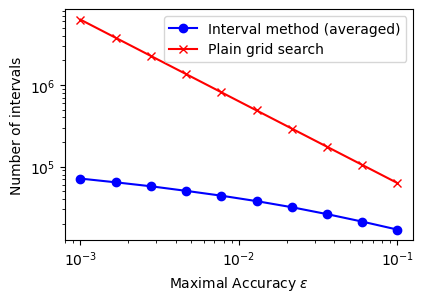

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3))
ax.plot(grid_search_accuracies, values, label='Interval method (averaged)', color='blue', marker='o')
ax.plot(grid_search_accuracies, naive_grid_search_intervals, label='Plain grid search', color='red', marker='x')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(prop={'size': 10})

ax.set_xlabel(r'Maximal Accuracy $\varepsilon$')
ax.set_ylabel('Number of intervals')


fig.savefig('cliff_intervals_vs_naive_comp.pdf')

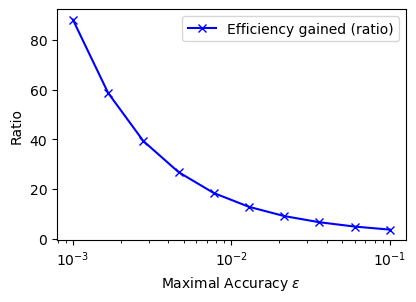

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3))

ax.plot(grid_search_accuracies, naive_grid_search_intervals/values, label='Efficiency gained (ratio)', color='blue', marker='x')
ax.set_xscale('log')
ax.legend(prop={'size': 10})

ax.set_xlabel(r'Maximal Accuracy $\varepsilon$')
ax.set_ylabel('Ratio')

fig.savefig('cliff_intervals_vs_naive_ratio.pdf')